In [1]:
from sklearn.linear_model import LogisticRegression # NOT MUCH EFFECT
from sklearn.ensemble import RandomForestClassifier # NOT MUCH EFFECT 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd ; import numpy as np 
import seaborn as sns ; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,MaxAbsScaler
from help import find_file ,list_files

# Standardization 

In [3]:
data = pd.read_csv(find_file("Social_Network_Ads.csv"))
data = data.drop(columns=["User ID","Gender"])

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x_train,x_test,y_train,y_test =  train_test_split(data.drop("Purchased",axis=1),data["Purchased"],test_size=0.2)

In [6]:
x_train.shape,y_train.shape

((320, 2), (320,))

### Scaling Data 

In [7]:
ss =  StandardScaler()

In [8]:
x_train_ =  ss.fit_transform(x_train)
x_test_ =  ss.transform(x_test)

In [9]:
age_mean,salary_mean =  ss.mean_
print(f"age mean : {age_mean}")
print(f"Salary mean : {salary_mean}")

age mean : 37.659375
Salary mean : 68131.25


In [10]:
ss.var_

array([1.10005850e+02, 1.10956402e+09])

In [11]:
df =  pd.DataFrame({"Age":x_train_[:,0],"salaray":x_train_[:,1]})

In [12]:
df.head()

,Age,salaray
0,1.462632,1.076812
1,-0.158211,1.707251
2,-0.253555,0.116143
3,-0.062867,-0.394212
4,-0.730273,0.566457


In [13]:
x_train_.shape

(320, 2)

### Checking out distributions 

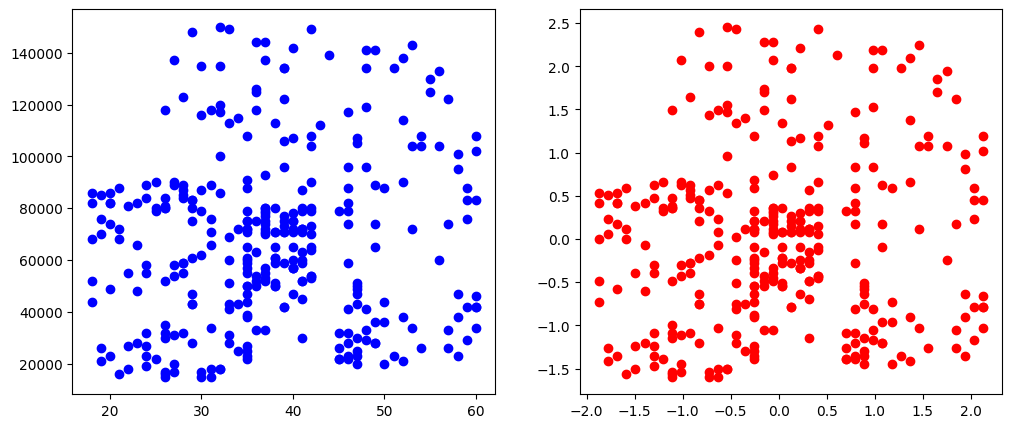

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],color='blue') #row=0, col=0
ax2.scatter(df["Age"],df["salaray"],color='red') 

Text(0.5, 1.0, 'After Scaling ')

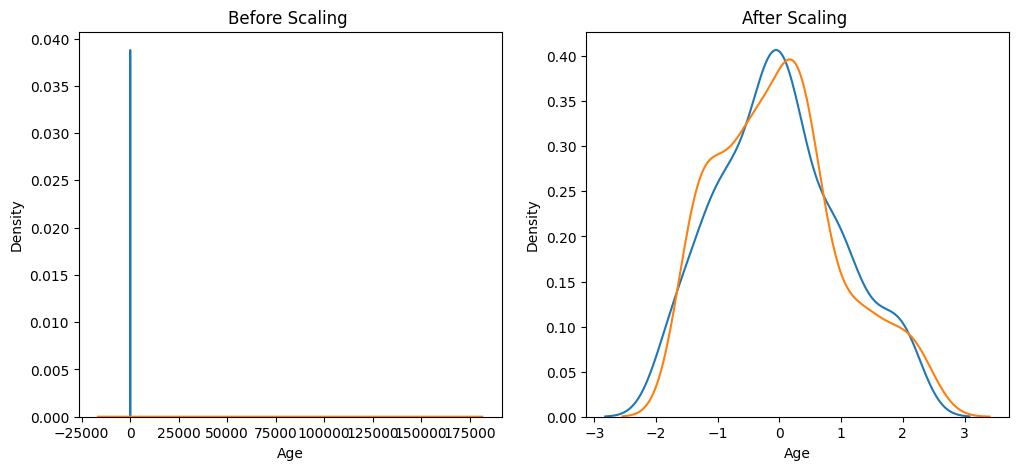

In [15]:
# probability density functions 
# feature constructed if compared togerther but 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["Age"],ax=ax2)
sns.kdeplot(df["salaray"],ax=ax2)
ax2.set_title("After Scaling ")

Text(0.5, 1.0, 'After Scaling ')

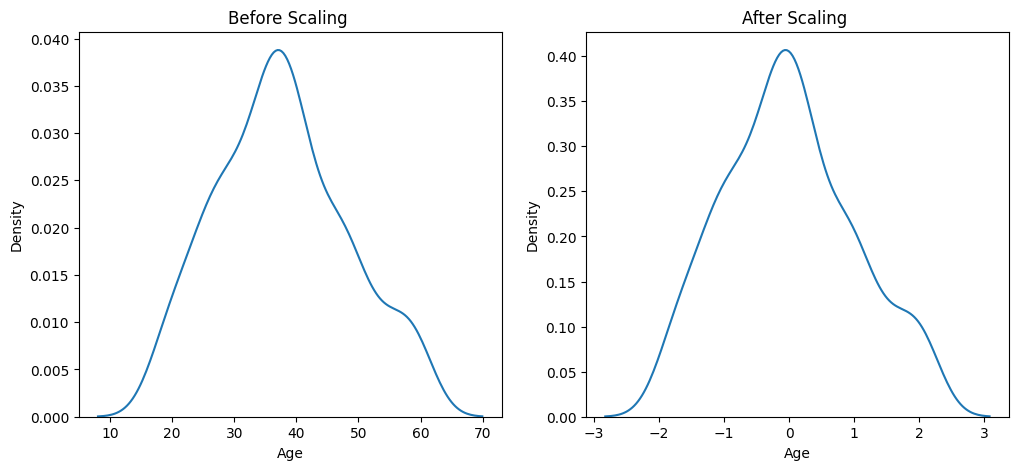

In [16]:
# density function of single column 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["Age"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["Age"],ax=ax2)
ax2.set_title("After Scaling ")

Text(0.5, 1.0, 'After Scaling ')

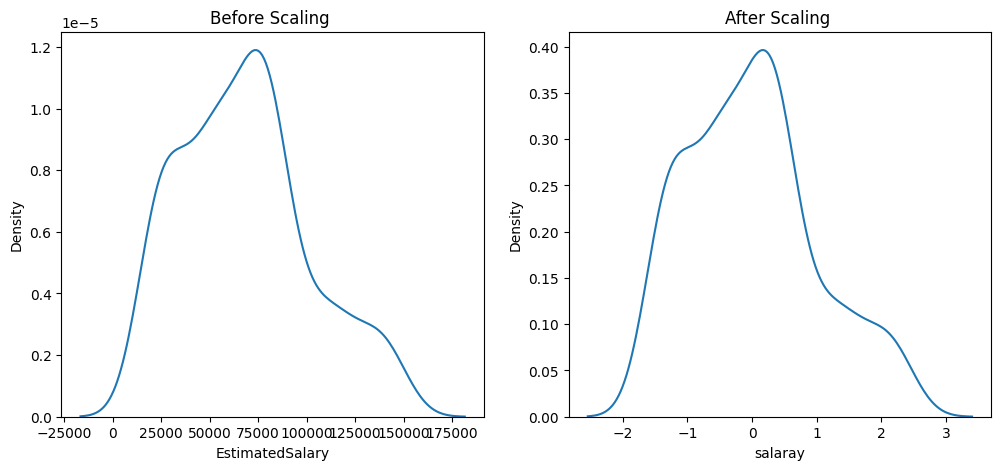

In [17]:
# density function of single column 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)
ax1.set_title("Before Scaling ")

sns.kdeplot(df["salaray"],ax=ax2)
ax2.set_title("After Scaling ")

### testing models 

In [18]:
model =  KNeighborsClassifier()
model_sclaed =  KNeighborsClassifier()

In [19]:
model.fit(x_train,y_train)
model.score(x_test,y_test )

0.825

In [20]:
model_sclaed.fit(x_train_,y_train)
model_sclaed.score(x_test_,y_test)

0.9

# Normalization 

In [21]:
data = pd.read_csv(find_file("wine_data.csv"),usecols=[0,1,2])
data.columns = ["target","alcohol","malic acid"]

In [22]:
data.head()

,target,alcohol,malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [23]:
x_train,x_test,y_train,y_test =  train_test_split(data.drop(columns=["target"],axis=1),data.target,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Before Scaling')

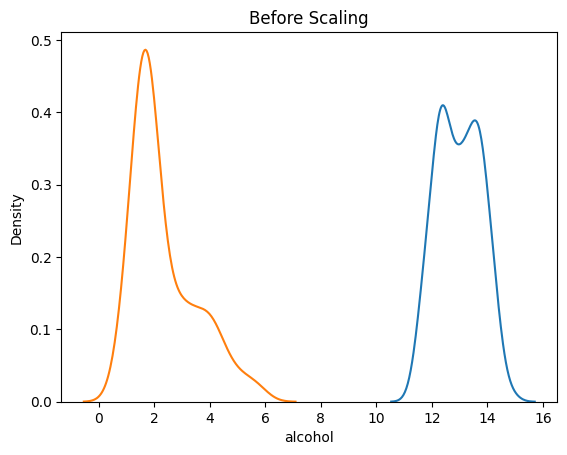

In [24]:
sns.kdeplot(x_train["alcohol"])
sns.kdeplot(x_train["malic acid"])
plt.title("Before Scaling")
## see how low the range is below Normalization 

In [25]:
data.target.unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot: xlabel='malic acid', ylabel='alcohol'>

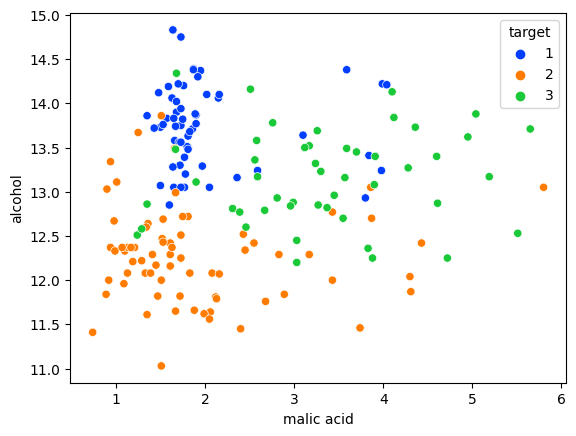

In [26]:
colors = {}
sns.scatterplot(data=data,x='malic acid',y='alcohol',hue='target',palette="bright")

##### MIN MAX SCALING 

In [27]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train)

MinMaxScaler()

In [28]:
x_train_1 = pd.DataFrame(min_max_scaler.transform(x_train),columns=x_train.columns)

x_test_1 = pd.DataFrame(min_max_scaler.transform(x_test),columns=x_test.columns)


Text(0.5, 1.0, 'Min Max Scaling ')

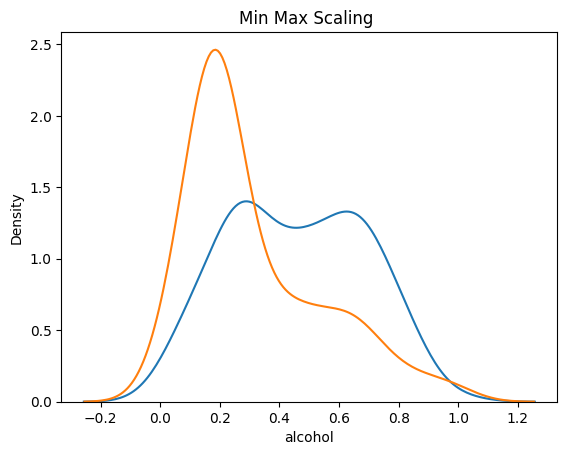

In [29]:
sns.kdeplot(x_train_1["alcohol"])
sns.kdeplot(x_train_1["malic acid"])
plt.title("Min Max Scaling ")

#### MAX ABS SCALING 

In [30]:
max_abs_scaler =  MaxAbsScaler()
max_abs_scaler.fit(x_train)

MaxAbsScaler()

In [31]:
x_train_2 = pd.DataFrame(max_abs_scaler.transform(x_train),columns=x_train.columns)
x_test_2 = pd.DataFrame(max_abs_scaler.transform(x_test),columns=x_test.columns)


Text(0.5, 1.0, ' Max Abs Scaling ')

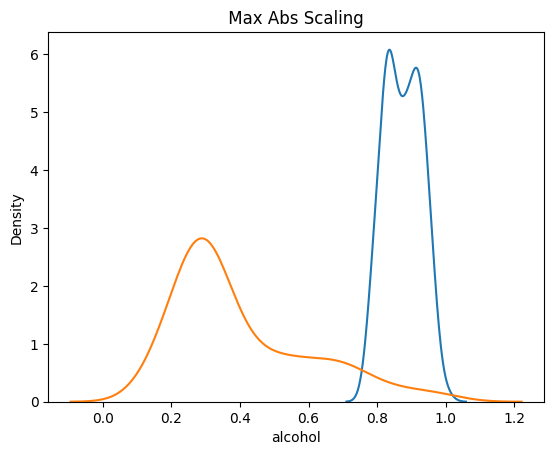

In [32]:
sns.kdeplot(x_train_2["alcohol"])
sns.kdeplot(x_train_2["malic acid"])
plt.title(" Max Abs Scaling ")

#### ROBUST SCALING

In [33]:
robust_scaler =  RobustScaler()
robust_scaler.fit(x_train)

RobustScaler()

In [34]:
x_train_3 =  pd.DataFrame(robust_scaler.transform(x_train),columns=x_train.columns)
x_test_3 =  pd.DataFrame(robust_scaler.transform(x_test),columns=x_test.columns)

Text(0.5, 1.0, 'Robust  Scaling ')

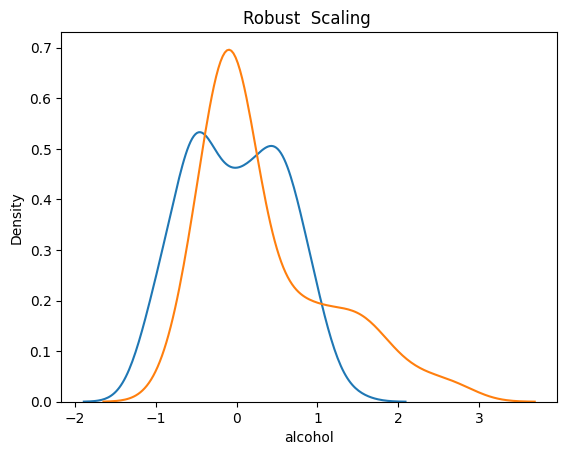

In [35]:
sns.kdeplot(x_train_3["alcohol"])
sns.kdeplot(x_train_3["malic acid"])
plt.title("Robust  Scaling ")

##### Logistic Regression

In [36]:
LogisticRegression().fit(x_train,y_train).score(x_test,y_test)

0.7777777777777778

In [37]:
LogisticRegression().fit(x_train_1,y_train).score(x_test_1,y_test)

0.7222222222222222

In [38]:
LogisticRegression().fit(x_train_2,y_train).score(x_test_2,y_test)

0.5277777777777778

In [39]:
LogisticRegression().fit(x_train_3,y_train).score(x_test_3,y_test)

0.75

##### Max abs scaling performing shitty 

##### RandomForestClassifier 

In [40]:
RandomForestClassifier().fit(x_train,y_train).score(x_test,y_test)

0.8888888888888888

In [41]:
RandomForestClassifier().fit(x_train_1,y_train).score(x_test_1,y_test)

0.8611111111111112

In [42]:
RandomForestClassifier().fit(x_train_2,y_train).score(x_test_2,y_test)

0.8888888888888888

In [43]:
RandomForestClassifier().fit(x_train_3,y_train).score(x_test_3,y_test)

0.8888888888888888

##### KNeighbors

In [44]:
KNeighborsClassifier().fit(x_train,y_train).score(x_test,y_test)

0.75

In [45]:
KNeighborsClassifier().fit(x_train_1,y_train).score(x_test_1,y_test)

0.75

In [46]:
KNeighborsClassifier().fit(x_train_2,y_train).score(x_test_2,y_test)

0.75

In [47]:
KNeighborsClassifier().fit(x_train_3,y_train).score(x_test_3,y_test)

0.7222222222222222